In [1]:
# imports
import json

# load questions 
questions = json.load(open('../data/v1.0/visdial_1.0_train.json'))['data']['questions']
questions[0:5]

['what color is the middle vase',
 'are there people going into the buildings',
 'is the person walking on a sidewalk',
 'what is wallpaper like',
 'does the fluid cover the bananas']

In [2]:
# import tokenizer
from torchtext.data import get_tokenizer

tokenizer = get_tokenizer("basic_english") # use basic_english tokenizer
qLengths = [len(tokenizer(q)) for q in questions] # all question lengths

# longest and shortest question length
print('The longest question is \'', max(questions, key=len), '\' of length ', max(qLengths))
print('And the shortest question is \'', min(questions, key=len), '\' of length ', min(qLengths))


The longest question is ' would you agree that it's possible that there used to be people there, but the meal is poisoned, and this poison caused them to think they were being raptured, when in fact they were actually dying, and that even now, they are dead at the base of the table ' of length  57
And the shortest question is ' tv ' of length  1


(1.0, 22.0)

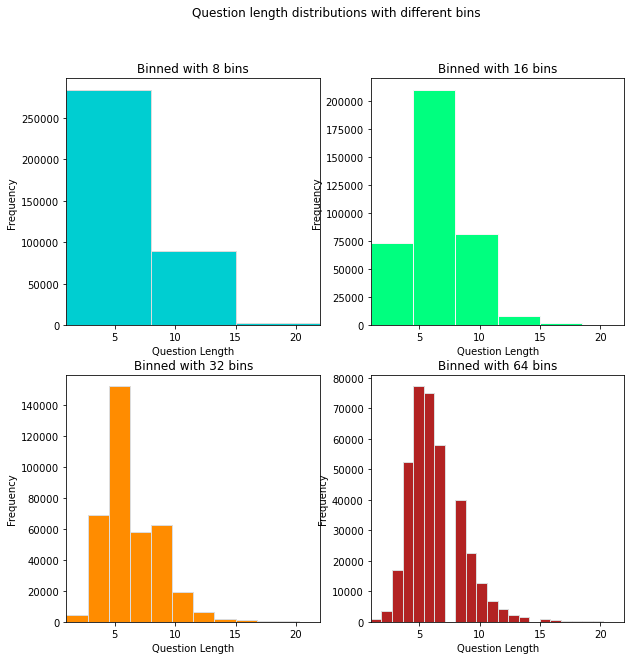

In [3]:
# question length distribution visualization
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Question length distributions with different bins')

axs[0, 0].hist(qLengths, bins=8, color='darkturquoise', edgecolor='gainsboro')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlabel('Question Length')
axs[0, 0].set_title('Binned with 8 bins')
axs[0, 0].set_xlim(xmin=1, xmax = 22)

axs[0, 1].hist(qLengths, bins=16, color='springgreen', edgecolor='whitesmoke')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_xlabel('Question Length')
axs[0, 1].set_title('Binned with 16 bins')
axs[0, 1].set_xlim(xmin=1, xmax = 22)

axs[1, 0].hist(qLengths, bins=32, color='darkorange', edgecolor='gainsboro')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_xlabel('Question Length')
axs[1, 0].set_title('Binned with 32 bins')
axs[1, 0].set_xlim(xmin=1, xmax = 22)

axs[1, 1].hist(qLengths, bins=64, color='firebrick', edgecolor='gainsboro')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_xlabel('Question Length')
axs[1, 1].set_title('Binned with 64 bins')
axs[1, 1].set_xlim(xmin=1, xmax=22)

In [4]:
# question length settings
qLengthBins = [8, 16, 32, 64] # list of question length bins

def qBinning(binSize):
    qList = [] # list of all questions
    for q in questions:
        if len(tokenizer(q)) > binSize:
            qList.append(tokenizer(q)[:binSize])
        else:
            qList.append(tokenizer(q)+((binSize-len(tokenizer(q)))*['unk_init'])) # unk_init is a special token with Glove Torch embedding of all zeros
    return qList

allQLists = {8: qBinning(8), 16: qBinning(16), 32: qBinning(32), 64: qBinning(64)} # dictionary of question lists

In [5]:
# import Glove embeddings
import torch
from torchtext.vocab import GloVe
import numpy as np

# glove hyperparameters
glove_params = [['6B', 50], ['6B', 100], ['6B', 300], ]
glove_size = ['6B', '42B', '840B']
glove_dim = [50, 100, 300]

# using GloVe vectors
glove_path = '../models/qEmbeddings/glove.pt'
qEmbeddings = {} # list of all embeddings

for allQListKeys, qBinnedList in allQLists.items():
    for g_size in glove_size:
        for g_dim in glove_dim:
            global_vectors = GloVe(name=g_size, dim=g_dim) # loading glove vectors
            
            # create embedding matrix for all questions
            current_qEmbeddings = [] # storing question embeddings
            for tokenizedQuestions in qBinnedList:
                current_qEmbeddings.append(global_vectors.get_vecs_by_tokens(
                    tokenizedQuestions, lower_case_backup=True))  # get embeddings for each question)
            # convert to torch tensor
            current_qEmbeddings = torch.stack(current_qEmbeddings)
            
            qEmbeddings[f'{g_size}_{g_dim}_{allQListKeys}'] = current_qEmbeddings # storing question embeddings for current glove parameters
            print(f'{g_size}_{g_dim}_{allQListKeys} Created!')
# save question embeddings
torch.save(qEmbeddings, glove_path)
print('Embeddings saved!')

6B_50_8 Created!
6B_100_8 Created!
6B_300_8 Created!


.vector_cache/glove.42B.300d.zip: 1.88GB [05:54, 5.29MB/s]                                


RuntimeError: no vectors found at .vector_cache/glove.42B.50d.txt

In [ ]:
checkpoint = torch.load(glove_path)
sample_qEmbeddings = checkpoint['6B_300_16']

In [23]:
GloVe(name='6B', dim=200).get_vecs_by_tokens(tokenizer('Hello there'), lower_case_backup=True)


100%|█████████▉| 399999/400000 [00:21<00:00, 18403.41it/s]


tensor([[ 0.2661,  0.2182, -0.1100, -0.4841, -0.1118, -0.0988, -0.4532,  0.4420,
         -0.0346,  0.1054, -0.2954, -0.1088,  0.2092,  0.5248, -0.1798, -0.3119,
         -0.2572,  0.6527,  0.2170,  0.8650,  0.4724, -0.0786,  0.3104, -0.1216,
         -0.1250, -0.4042,  0.5380, -0.5784, -0.6367, -0.1350, -0.0405,  0.4138,
         -0.6320, -0.3885, -0.4377, -0.1971,  0.2878,  0.3604, -0.0329, -0.2036,
         -0.3492,  0.9592, -0.5122, -0.1903,  0.1567,  0.1770,  0.5530,  0.2764,
         -0.1371,  0.9136,  0.2595, -0.3011,  0.4834, -0.0469, -0.2796, -0.0404,
         -0.4577,  0.2768, -0.1447,  0.0365,  0.3602, -0.5494,  0.1936, -0.3826,
         -0.2966, -0.1894,  0.0957,  0.4665,  0.3366,  0.7835,  0.4952, -0.8242,
          0.3440, -0.5004, -0.7107, -0.2571, -0.3662,  0.6175, -0.3128, -0.0424,
          0.3792, -0.6238,  0.2721,  0.3285, -0.2305, -0.1247,  0.2990, -0.2253,
         -0.2704, -0.4447, -0.1589,  0.2033, -0.2568, -0.8051, -0.3631,  0.5591,
          0.1948, -0.0875, -

In [ ]:
'''Tokenize a sentence using a glove model, pass it through an LSTM and return the hidden state of each word'''
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm


def sentence_to_hidden_state(sentence, glove_model, hidden_dim, batch_size):
    # tokenize the sentence
    tokenized_sentence = sentence.split()
    # get the glove vectors for each word
    glove_vectors = []
    for word in tokenized_sentence:
        if word in glove_model:
            glove_vectors.append(glove_model[word])
        else:
            glove_vectors.append(glove_model['unk'])
    # create the input tensor
    input_tensor = torch.FloatTensor(glove_vectors)
    print(input_tensor.shape)
    # create the LSTM
    lstm = nn.LSTM(300, hidden_dim)
    # create the hidden state
    hidden = (torch.randn(1, batch_size, hidden_dim),
              torch.randn(1, batch_size, hidden_dim))
    # pass the input through the LSTM
    lstm_out, hidden = lstm(input_tensor.view(
        len(tokenized_sentence), batch_size, -1), hidden)
    # return the hidden state of each word
    return hidden[0].squeeze().detach().numpy()


'''Create the hidden state for each question'''
hidden_states = []
for question in tqdm(questions[:5]):
    hidden_states.append(sentence_to_hidden_state(
        question, glove_6b_300, 100, 1))

hidden_states[0].shape


In [ ]:
'''Tokenize a sentence using a glove model, pass it through an LSTm and return the last LSTM hidden state'''
from nltk.tokenize import RegexpTokenizer
import itertools
import torch
import torch.nn as nn
import torch.nn.functional as F


def sentence_LSTM(glove_model, sentence):
    # tokenize the sentence
    tokenizer = RegexpTokenizer(r'\w+')  # to remove punctuations
    tokenized_sentence = tokenizer.tokenize(sentence.lower())

    # get the glove embedding for each word in the sentence
    glove_embeddings = []
    for word in tokenized_sentence:
        if word in glove_model.keys():
            glove_embeddings.append(glove_model[word])
        else:
            glove_embeddings.append(glove_model['unk'])

    # convert the glove embeddings to a tensor
    glove_embeddings = torch.tensor(glove_embeddings).float()

    # pass the glove embeddings through an LSTM
    # https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
    lstm = nn.LSTM(input_size=300, hidden_size=300,
                   num_layers=1, batch_first=True)
    lstm_out, (h_n, c_n) = lstm(
        glove_embeddings.view(1, len(tokenized_sentence), 300))

    # return the last hidden state
    return h_n.squeeze(0)


'''Testing LSTM hidden state output'''
sentence_LSTM(glove_6b_300, "What is the color of the shirt?").shape
